In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits as ld
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture as GMM
from sklearn.mixture import BayesianGaussianMixture
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def plot_digit_data(data):
    fig, ax = plt.subplots(12, 4, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

In [14]:
digit_data = ld()
pca = PCA(n_components=2, whiten=False)
data = pca.fit_transform(digit_data.data)
print(data.shape)

(1797, 2)


In [8]:
def kde(n):
    digit_data = ld()
    print(digit_data.shape)
    pca = PCA(n_components=n, whiten=False)
    data = pca.fit_transform(digit_data.data)
    params = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), params, cv=5)
    grid.fit(data)
    print("bandwidth selected : ",grid.best_estimator_.bandwidth )

    kde = grid.best_estimator_

    new_data = kde.sample(48, random_state=0)
    new_data = pca.inverse_transform(new_data)
    print()
    print("48 new data points generated : ")
    print()
    plot_digit_data(new_data)

bandwidth selcted :  3.79269019073225

48 new data points generated : 



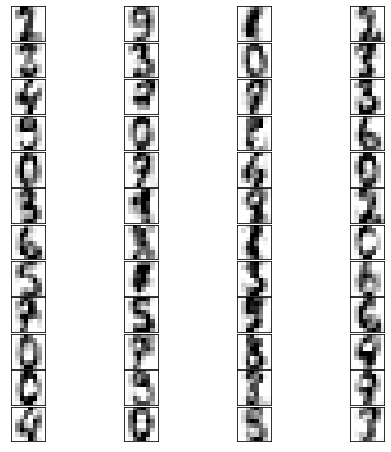

In [5]:
kde(16)

bandwidth selcted :  2.9763514416313175

48 new data points generated : 



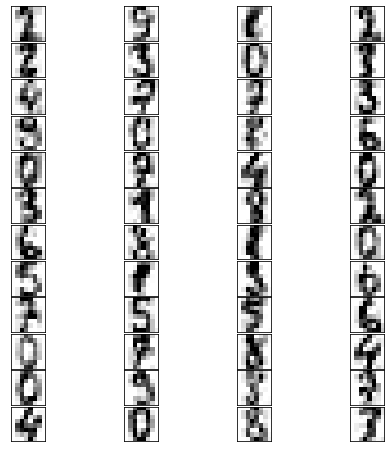

In [6]:
kde(28)

bandwidth selcted :  2.9763514416313175

48 new data points generated : 



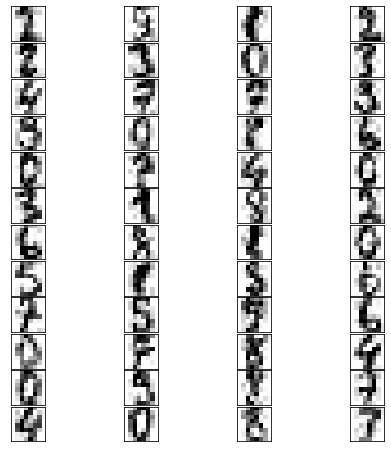

In [7]:
kde(40)


